<a href="https://colab.research.google.com/github/yeonwoo3611/jejumaster/blob/main/kimyeonwoo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [120]:
PATH = './sample_data/'
FILE = '전국무인택배함표준데이터.csv'

In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 코랩에서 위 코드를 실행시킨 후  반드시 코랩 메뉴: "런타임>런타임 다시 시작" 합니다.

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [63]:
import pandas  as pd
import numpy as np
import matplotlib as plt
print(pd.__version__)
print(np.__version__)
(plt.__version__)

1.5.3
1.23.5


'3.7.1'

In [121]:
import pandas as pd

file = PATH+FILE
df = pd.read_csv(file, encoding = 'cp949') #cp949: 윈도우OS 기본 인코딩 포맷
df.head(5)

,시도명,시군구명,시설명,소재지도로명주소,위도,경도
0,서울특별시,중구,장충공영 주차장,서울특별시 중구 퇴계로50길 59,37.559971,127.001327
1,서울특별시,중구,충현공영주차장,서울특별시 중구 동호로11나길 47,37.552183,127.005701
2,서울특별시,중구,약수동 공영주차장,서울특별시 중구 동호로 8다길 22,37.552241,127.013326
3,서울특별시,중구,버티 공영주차장,서울특별시 중구 동호로 17길 270,37.549053,127.006305
4,서울특별시,중구,명동주민센터,서울특별시 중구 퇴계로20길 3,37.560048,126.985818


In [122]:
df.columns #컬럼 이름 확인

Index(['시도명', '시군구명', '시설명', '소재지도로명주소', '위도', '경도'], dtype='object')

In [134]:
len(set(df['시설명'])) #총 개수 출력

792

In [128]:
#컬럼 삭제(위도와 경도 삭제)
df = df.drop(['위도', '경도'], axis=1)
df

KeyError: ignored

In [129]:
df.columns #컬럼 이름 확인(위도와 경도가 잘 삭제 되었는가? 확인)

Index(['시도명', '시군구명', '시설명', '소재지도로명주소'], dtype='object')

In [130]:
# 중복 데이터 제거(880->829로 변경됨)
df = df.drop_duplicates()
df

,시도명,시군구명,시설명,소재지도로명주소
0,서울특별시,중구,장충공영 주차장,서울특별시 중구 퇴계로50길 59
1,서울특별시,중구,충현공영주차장,서울특별시 중구 동호로11나길 47
2,서울특별시,중구,약수동 공영주차장,서울특별시 중구 동호로 8다길 22
3,서울특별시,중구,버티 공영주차장,서울특별시 중구 동호로 17길 270
4,서울특별시,중구,명동주민센터,서울특별시 중구 퇴계로20길 3
...,...,...,...,...
875,경상남도,창원시,중앙동행정복지센터 입구,경상남도 창원시 성산구 외동반림로 5
876,경상남도,창원시,창동 공영주차장(1층 휴게공간),경상남도 창원시 마산합포구 불종거리로 13
877,경상남도,창원시,문화동행정복지센터(동대입구),경상남도 창원시 마산합포구 문화남5길 36
878,경상남도,창원시,내서읍행정복지센터 게시판 뒤,경상남도 창원시 마산회원구 내서읍 중리 상곡로 65


In [135]:
#시군구 컬럼에서 제주시 를 포함하는 데이터만 출력
df[df['시군구명'].str.contains('제주시')]

,시도명,시군구명,시설명,소재지도로명주소
833,제주특별자치도,제주시,제주시 외도동 주민센터,제주특별자치도 제주시 일주서로 7350
834,제주특별자치도,제주시,제주중앙지하상가,제주특별자치도 제주시 중앙로 60
835,제주특별자치도,제주시,이도일동도시재생주민협의체,제주특별자치도 제주시 오현길 9
836,제주특별자치도,제주시,제주시 인구보건복지협회,제주특별자치도 제주시 신대로13길 21
837,제주특별자치도,제주시,탐라장애인종합복지관,제주특별자치도 제주시 광양4길 32
838,제주특별자치도,제주시,애월읍사무소,제주특별자치도 제주시 애월읍 고성8길 43
839,제주특별자치도,제주시,한림읍사무소,제주특별자치도 제주시 한림읍 한림상로 132
840,제주특별자치도,제주시,아라동주민센터,제주특별자치도 제주시 인다8길 5
841,제주특별자치도,제주시,삼화지구,제주특별자치도 제주시 화삼북로 38


In [136]:
#시군구 컬럼에서 서귀포 를 포함하는 데이터만 출력
df[df['시군구명'].str.contains('서귀포')]


,시도명,시군구명,시설명,소재지도로명주소
851,제주특별자치도,서귀포시,서귀포시 동홍동 주민센터,제주특별자치도 서귀포시 동홍로 104
852,제주특별자치도,서귀포시,서귀포시 천지동 경로당,제주특별자치도 서귀포시 서문로 37
853,제주특별자치도,서귀포시,동부종합사회복지관,제주특별자치도 서귀포시 성산읍 일출로 14-11
854,제주특별자치도,서귀포시,서귀포동홍주공2단지,제주특별자치도 서귀포시 동홍중앙로 30
855,제주특별자치도,서귀포시,표선면사무소,제주특별자치도 서귀포시 표선면 표선중앙로 74


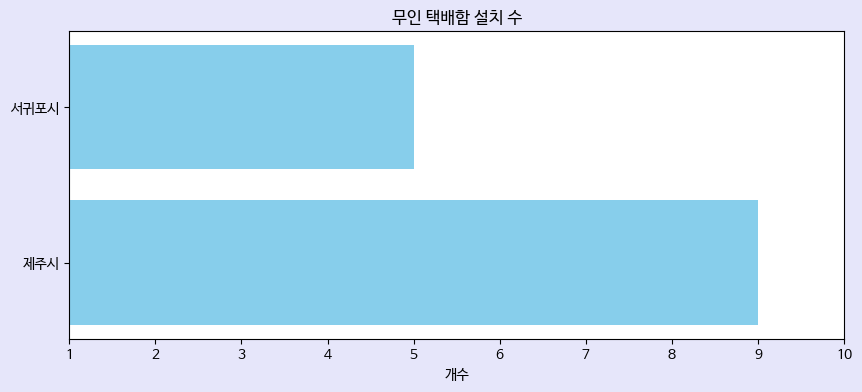

In [137]:
# 가로 막대 그래프

import pandas as pd
import matplotlib.pyplot as plt

# 데이터
data = {
    '시군구명': ['제주시', '제주시', '제주시', '제주시', '제주시', '제주시',
             '제주시', '제주시', '제주시',
             '서귀포시', '서귀포시', '서귀포시', '서귀포시', '서귀포시'],
    '시설명': ['제주시 외도동 주민센터', '제주중앙지하상가',
            '이도일동도시재생주민협의체', '제주시 인구보건복지협회',
            '탐라장애인종합복지관', '애월읍사무소', '한림읍사무소',
            '아라동주민센터', '삼화지구',
            '서귀포시 동홍동 주민센터', '서귀포시 천지동 경로당',
            '동부종합사회복지관', '서귀포동홍주공2단지', '표선면사무소', ]
}
df = pd.DataFrame(data)

# '시군구명' 그룹화하여 개수를 세기
count_sikun = df['시군구명'].value_counts()

# 그래프 그리기
plt.figure(figsize=(10, 4), facecolor='lavender')
plt.barh(count_sikun.index, count_sikun.values, color='skyblue')
plt.title('무인 택배함 설치 수')
plt.xlabel('개수')
# X 축 범위를 1부터 시작하도록 설정
plt.xlim(1, max(count_sikun) + 1)
plt.show()

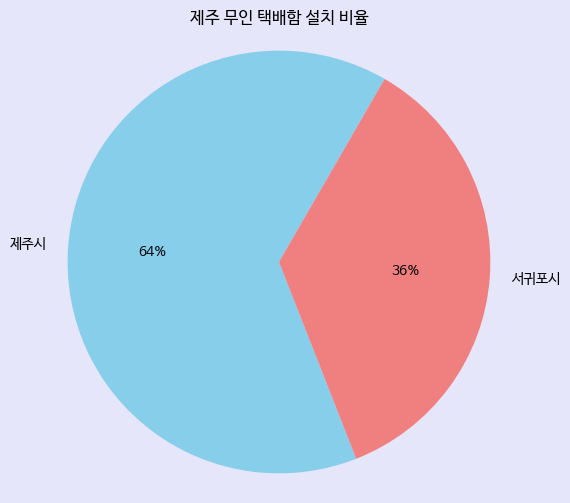

In [117]:
# 원형 차트로 비율 확인

import pandas as pd
import matplotlib.pyplot as plt

data = {
    '시군구명': ['제주시', '제주시', '제주시', '제주시', '제주시', '제주시',
             '제주시', '제주시', '제주시',
             '서귀포시', '서귀포시', '서귀포시', '서귀포시', '서귀포시'],}
df = pd.DataFrame(data)

count_sikun = df['시군구명'].value_counts()

# 원형 그래프 그리기
plt.figure(figsize=(6, 6), facecolor='lavender')
plt.pie(count_sikun, labels=count_sikun.index, autopct='%1.0f%%',startangle=60, colors=['skyblue', 'lightcoral'])
plt.title('제주 무인 택배함 설치 비율')
plt.axis('equal')  # 원형 그래프를 원형으로 유지
plt.show()

In [101]:
!pip install folium

In [118]:
# 지도로 설치 장소 확인

import folium

deli = folium.Map(location=[33.2141, 126.3144], zoom_start=10)  # 초기 지도 위치 및 확대 수준 설정

# 제주 무인 택배 위치
locations = [
    {"name": "제주시 외도동 주민센터", "lat": 33.493030, "lon": 126.432271},
    {"name": "제주중앙지하상가", "lat": 33.5131616, "lon": 126.5230202},
    {"name": "이도일동도시재생주민협의체", "lat": 33.506261, "lon": 126.527523},
    {"name": "제주시 인구보건복지협회", "lat": 33.487901, "lon": 126.498900},
    {"name": "삼화지구", "lat": 33.517103, "lon": 126.576925},
    {"name": "탐라장애인종합복지관", "lat": 33.501510, "lon": 126.524986},
    {"name": "애월읍사무소", "lat": 33.462163, "lon": 126.329966},
    {"name": "한림읍사무소", "lat": 33.410199, "lon": 126.267189},
    {"name": "아라동주민센터", "lat": 33.4763337, "lon": 126.5452322},
    {"name": "서귀포시 동홍동 주민센터", "lat": 33.25785315, "lon": 126.5689579},
    {"name": "서귀포시 천지동 경로당", "lat": 33.24959795, "lon": 126.558408},
    {"name": "서귀포동홍주공2단지", "lat": 33.25304804, "lon": 126.5689579},
    {"name": "표선면사무소", "lat": 33.32667927, "lon": 126.8310104},
    {"name": "동부종합사회복지관", "lat": 33.4466856, "lon": 126.9132007432},
]

# 무인 택배 위치를 지도에 표시
for location in locations:
    popup_text = f'<div style="white-space: nowrap;">{location["name"]}</div>'  # 텍스트를 가로로
    folium.Marker(
        location=[location['lat'], location['lon']],  # 위도, 경도 순서로!!
        popup=folium.Popup(popup_text, max_width=200)  # 지도창 크기
    ).add_to(deli)

deli

In [103]:
# 파일 저장하기
file = PATH+'Jejudeli.csv'
df.to_csv(file, encoding='utf-8', mode='w', index=True)